In [30]:
# 8 nodes
# sequential, 1 thread
# 4MB and 64MB files

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

Text(0.5,1,'4MB')

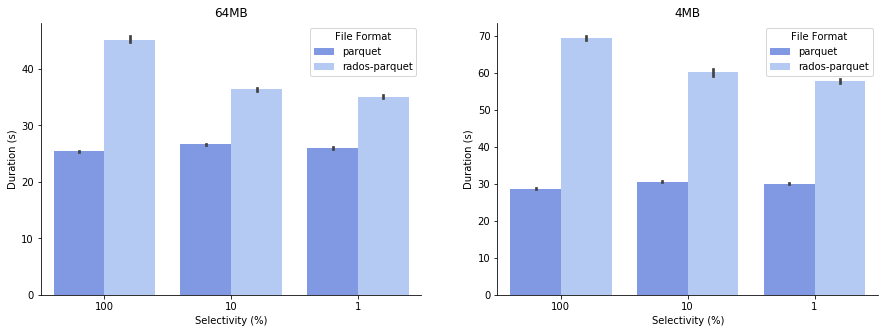

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'hspace': 0.1, 'wspace': 0.2})
palette = sns.color_palette('coolwarm', n_colors=5)
plt.rcParams.update({'font.size': 10})
sns.despine(top=True, right=True)

def plot(axs):
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in pq_10:
      results.append([e, "parquet", "10"])
    for e in pq_1:
      results.append([e, "parquet", "1"])
    for e in rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ax=axs, palette=palette)
    

    
#  64MB / 10
rpq_1 =  [34.89410161972046, 35.33844804763794, 34.818780183792114]
rpq_10 =  [36.68063807487488, 36.12192249298096, 36.667436361312866]
rpq_100 =  [45.82290577888489, 44.68938636779785, 44.78087878227234]
pq_1 =  [26.086652755737305, 25.9409396648407, 25.88572335243225]
pq_10 =  [26.588201999664307, 26.72333288192749, 26.622409343719482]
pq_100 =  [25.488560438156128, 25.31244444847107, 25.447848320007324]
plot(axs[0])

# 4MB / 130
rpq_1 =  [57.43201923370361, 58.36152768135071, 57.20792078971863]
rpq_10 =  [59.0811083316803, 60.88957643508911, 60.5244357585907]
rpq_100 =  [69.9152901172638, 68.94353890419006, 69.32586002349854]
pq_100 =  [28.695841789245605, 28.64312195777893, 28.75735378265381]
pq_10 =  [30.76074528694153, 30.418774366378784, 30.33691954612732]
pq_1 =  [30.07595157623291, 29.96924662590027, 29.920074462890625]
plot(axs[1])

axs[0].set_title('64MB')
axs[1].set_title('4MB')